In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
import json

# Load the JSON data
with open('updated_inventory_data.json') as f:
    data = json.load(f)

# Convert JSON data to a pandas DataFrame
df = pd.DataFrame(data)
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Product Demand
0,Clothing,3907,42.47,In Stock,70,2972.90,Male,308,7,4,4,UPS,18.26,1
1,Sports,3122,38.19,Out of Stock,52,1985.88,Female,647,5,8,3,FedEx,15.83,1
2,Electronics,7447,57.43,In Stock,59,3388.37,Female,356,1,3,3,FedEx,17.76,1
3,Home,7593,67.97,In Stock,94,6389.18,Female,146,1,10,4,DHL,19.93,1
4,Electronics,8805,10.64,Out of Stock,69,734.16,Female,102,6,4,2,DHL,12.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Home,7048,69.96,In Stock,93,6506.28,Male,936,1,8,5,UPS,5.53,1
520,Electronics,4297,79.97,In Stock,52,4158.44,Male,175,3,8,1,FedEx,11.51,1
521,Clothing,7238,47.47,Out of Stock,69,3275.43,Female,611,1,9,4,UPS,17.00,1
522,Sports,3560,15.17,Out of Stock,17,257.89,Male,180,4,9,4,DHL,8.44,0


In [5]:
df

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Product Demand
0,Clothing,3907,42.47,In Stock,70,2972.90,Male,308,7,4,4,UPS,18.26,1
1,Sports,3122,38.19,Out of Stock,52,1985.88,Female,647,5,8,3,FedEx,15.83,1
2,Electronics,7447,57.43,In Stock,59,3388.37,Female,356,1,3,3,FedEx,17.76,1
3,Home,7593,67.97,In Stock,94,6389.18,Female,146,1,10,4,DHL,19.93,1
4,Electronics,8805,10.64,Out of Stock,69,734.16,Female,102,6,4,2,DHL,12.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Home,9620,65.79,In Stock,17,1118.43,Other,245,6,5,5,DHL,15.19,0
996,Electronics,1143,49.90,In Stock,69,3443.10,Other,294,4,5,5,DHL,8.22,1
997,Electronics,3841,92.89,In Stock,25,2322.25,Female,246,4,6,5,FedEx,13.59,0
998,Electronics,9122,14.54,In Stock,84,1221.36,Other,258,4,1,2,FedEx,6.65,1


In [19]:
# Select relevant features for demand forecasting
features = ['Product type', 'SKU', 'Price', 'Availability', 'Number of products sold', 'Revenue generated', 'Customer demographics', 'Stock levels', 'Lead times', 'Order quantities', 'Shipping times', 'Shipping carriers', 'Shipping costs']

# Drop rows with missing values
df.dropna(subset=features, inplace=True)

In [20]:
df


,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,Shipping times,Shipping carriers,Shipping costs,Product Demand
0,Clothing,3907,42.47,In Stock,70,2972.90,Male,308,7,4,4,UPS,18.26,1
1,Sports,3122,38.19,Out of Stock,52,1985.88,Female,647,5,8,3,FedEx,15.83,1
2,Electronics,7447,57.43,In Stock,59,3388.37,Female,356,1,3,3,FedEx,17.76,1
3,Home,7593,67.97,In Stock,94,6389.18,Female,146,1,10,4,DHL,19.93,1
4,Electronics,8805,10.64,Out of Stock,69,734.16,Female,102,6,4,2,DHL,12.34,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519,Home,7048,69.96,In Stock,93,6506.28,Male,936,1,8,5,UPS,5.53,1
520,Electronics,4297,79.97,In Stock,52,4158.44,Male,175,3,8,1,FedEx,11.51,1
521,Clothing,7238,47.47,Out of Stock,69,3275.43,Female,611,1,9,4,UPS,17.00,1
522,Sports,3560,15.17,Out of Stock,17,257.89,Male,180,4,9,4,DHL,8.44,0


In [21]:
# Perform one-hot encoding for categorical variables
categorical_features = ['Product type', 'Availability', 'Customer demographics', 'Shipping carriers']
df_encoded = pd.get_dummies(df, columns=categorical_features)


In [22]:
# Split the data into training and testing sets
X = df_encoded.drop('Product Demand', axis=1)
y = df_encoded['Product Demand']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)


In [24]:
# Evaluate the model (e.g., using metrics like mean squared error)
mse = ((y_pred - y_test) ** 2).mean()
print('Mean Squared Error:', mse)


Mean Squared Error: 0.07321913361769462


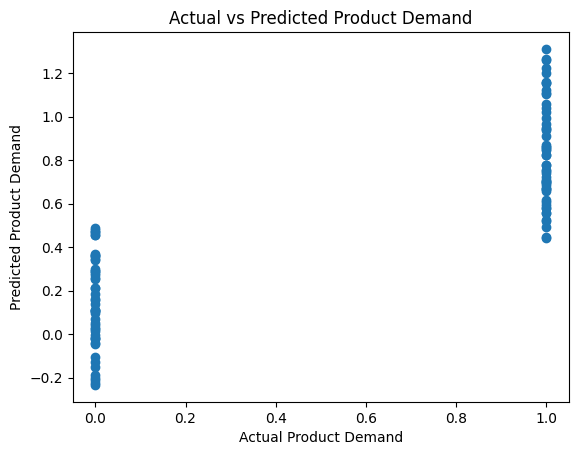

In [25]:

import matplotlib.pyplot as plt

# Scatter plot of actual vs predicted values
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Product Demand')
plt.ylabel('Predicted Product Demand')
plt.title('Actual vs Predicted Product Demand')
plt.show()


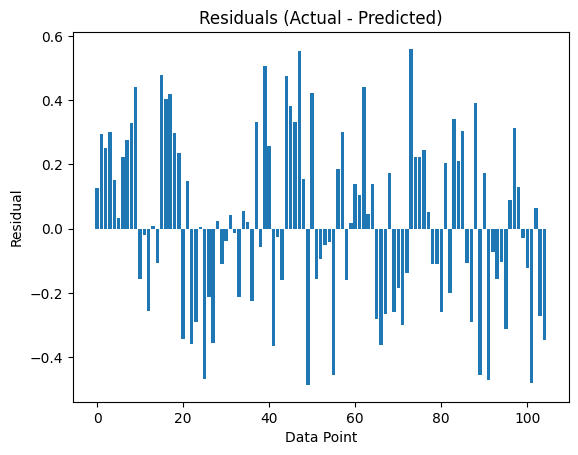

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the residuals
residuals = y_test - y_pred

# Create a bar graph of the residuals
plt.bar(np.arange(len(residuals)), residuals)
plt.xlabel('Data Point')
plt.ylabel('Residual')
plt.title('Residuals (Actual - Predicted)')
plt.show()
